In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path = '/feynman/home/dap/lcs/as274094/work/psf_dataset_generation/output/psf_dataset2/'
test_dataset = np.load(data_path + 'test_Euclid_res_20000_TestStars_id_002GT_100_bins.npy', allow_pickle=True)[()]
train_dataset = np.load(data_path + 'train_Euclid_res_52000_TrainStars_id_002GT_100_bins.npy', allow_pickle=True)[()]

In [25]:
n_test_stars = test_dataset['stars'].shape[0]
np.sum(train_dataset['stars'][0:n_test_stars,:,:]-test_dataset['stars'])
np.min(train_dataset['stars'][0:n_test_stars,:,:])-np.min(test_dataset['stars'])

SNR_50_400.shape

(18502,)

In [71]:
snr_50_400_indexes = np.where(test_dataset['SNR'] >= 50)[0]
test_stars_50_400 = test_dataset['noisy_stars'][snr_50_400_indexes]
test_stars_noiseless = test_dataset['stars'][snr_50_400_indexes]
classes_50_400 = np.array(test_dataset['SED_ids'])[snr_50_400_indexes]
snr_50_400 = test_dataset['SNR'][snr_50_400_indexes]
snr_50_400.shape

(18502,)

Star # 13187 Class: 6 SNR: 366.7467170131853


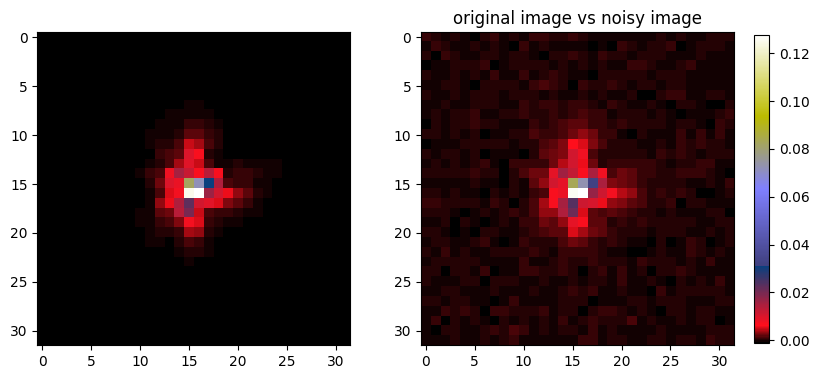

In [72]:
index = np.random.randint(low=0, high= test_stars_50_400.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [4, 5]})
axs[0].imshow(test_stars_noiseless[index,:,:], cmap='gist_stern')
im = axs[1].imshow(test_stars_50_400[index,:,:], cmap='gist_stern')
fig.colorbar(im, ax=axs[1], shrink=0.4)
plt.title('original image vs noisy image')
plt.show
print('Star #', index,'Class:', classes_50_400[index], 'SNR:', snr_50_400[index])


Class: 7 SNR: 178.09696882849613


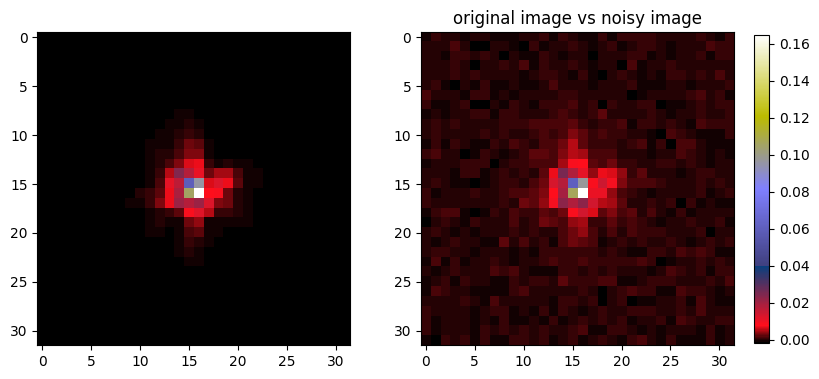

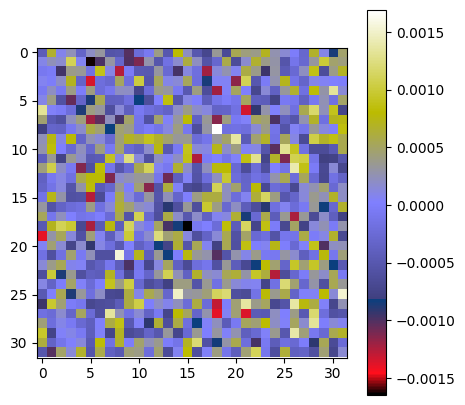

In [10]:
index = np.random.randint(low=0, high= train_dataset['stars'].shape[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [4, 5]})
axs[0].imshow(train_dataset['stars'][index,:,:], cmap='gist_stern')
im = axs[1].imshow(train_dataset['noisy_stars'][index,:,:], cmap='gist_stern')
fig.colorbar(im, ax=axs[1], shrink=0.4)
plt.title('original image vs noisy image')
plt.show
print('Star #', index,'Class:', train_dataset['SED_ids'][index], 'SNR:', train_dataset['SNR'][index])

noisy_train_pattern = train_dataset['noisy_stars'][index,:,:] - train_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_train_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

Class: 10 SNR: 342.33342517734565


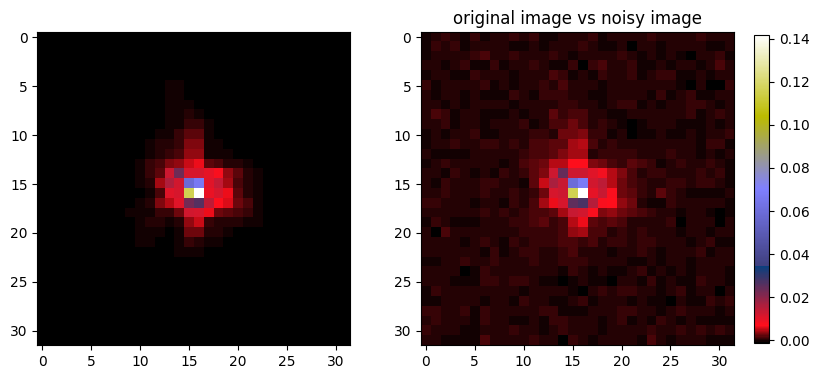

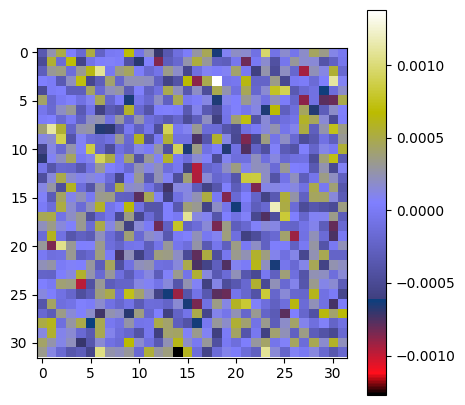

In [21]:
index = np.random.randint(low=0, high= test_dataset['stars'].shape[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [4, 5]})
axs[0].imshow(test_dataset['stars'][index,:,:], cmap='gist_stern')
im = axs[1].imshow(test_dataset['noisy_stars'][index,:,:], cmap='gist_stern')
fig.colorbar(im, ax=axs[1], shrink=0.4)
plt.title('original image vs noisy image')
plt.show
print('Star #', index,'Class:', test_dataset['SED_ids'][index], 'SNR:', test_dataset['SNR'][index])

noisy_test_pattern = test_dataset['noisy_stars'][index,:,:] - test_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_test_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[4, 4])
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
       fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]
#cax = fig.add_subplot(gs[:, -1])
cax = fig.add_axes([0.85, 0.1, 0.05, 0.8])

# Plot the first subplot
im1 = axs[0].imshow(train_dataset['stars'][0,:,:], cmap='gist_stern')

# Plot the second subplot
im2 = axs[1].imshow(train_dataset['stars'][1,:,:], cmap='gist_stern')

# Plot the third subplot
im3 = axs[2].imshow(train_dataset['stars'][2,:,:], cmap='gist_stern')

# Plot the fourth subplot
im4 = axs[3].imshow(train_dataset['stars'][3,:,:], cmap='gist_stern')

# Add a colorbar to the figure
fig.colorbar(im1, cax=cax)

# Adjust the spacing between subplots and the colorbar
plt.subplots_adjust(wspace=0.1, hspace=0.1, right=0.8)

# Show the plot
plt.show()

# SEDs

In [12]:
train_SEDs = train_dataset['SED_ids']
unique_values, counts = np.unique(train_SEDs, return_counts=True)

for val, count in zip(unique_values, counts):
    if count > 1:
        print(f"{val} repeated {count} times")

print("")
test_SEDs = test_dataset['SED_ids']
unique_values, counts = np.unique(test_SEDs, return_counts=True)

for val, count in zip(unique_values, counts):
    if count > 1:
        print(f"{val} repeated {count} times")

0 repeated 3857 times
1 repeated 4034 times
2 repeated 4027 times
3 repeated 3988 times
4 repeated 4122 times
5 repeated 3948 times
6 repeated 4078 times
7 repeated 4070 times
8 repeated 3977 times
9 repeated 3948 times
10 repeated 3954 times
11 repeated 3990 times
12 repeated 4007 times

0 repeated 1494 times
1 repeated 1537 times
2 repeated 1527 times
3 repeated 1533 times
4 repeated 1509 times
5 repeated 1599 times
6 repeated 1503 times
7 repeated 1612 times
8 repeated 1554 times
9 repeated 1518 times
10 repeated 1503 times
11 repeated 1573 times
12 repeated 1538 times


In [ ]:
SED_path = '/feynman/home/dap/lcs/as274094/work/wf-psf/data/SEDs/save_SEDs/'
stellar_SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)
stellar_SEDs.shape